### Import Libraries

In [199]:
#pip install faker pandas numpy

In [200]:
import pandas as pd
import numpy as np
import random
from faker import Faker


#### initialize Faker

In [201]:
fake = Faker()


### Define Data Options (Categories)

In [202]:
#fabric_types = ['Ankara', 'Cotton', 'Silk', 'Denim', 'Polyester', 'Linen', 'Jeans']
fabric_types = ['Damask', 'Irish', 'Cashmen', 'Sevenstar', 'Brocade', 'Crepe', 'Chinox','Silk','Jonkoso','Licra','Milkado','Jeans','Rib','Linen']
colors = ['Red', 'Blue', 'Green', 'Black', 'White', 'Pink', 'Brown', 'Grey', 'Cream', 'Yellow','magenta','Violet','wine','orange','Olive','pitch','lilac']
genders = ['Male', 'Female']
measurement_units = ['Yards', 'Meters']
seasons = ['festival', 'normal']
occasions = ['Casual', 'Wedding', 'Office', 'Party', 'Church']
locations = ['Lagos', 'Abuja', 'Ibadan', 'Enugu', 'Benin', 'Abeokuta', 'Port Harcourt', 'Kano']
stitch_quality = ['Low', 'Medium', 'High']
style_types = ['Traditional', 'Corporate', 'Casual', 'Fashion']
sold_status = ['Fast', 'Slow']


### Generate Random Synthetic Rows

In [203]:
data = []

for i in range(1, 501):
    fabric = random.choice(fabric_types)
    color = random.choice(colors)
    gender = random.choice(genders)
    measurement_units = random.choice(measurement_units)
    price = random.randint(2000, 8000)
    season = random.choice(seasons)
    occasion = random.choice(occasions)
    location = random.choice(locations)
    stitch = random.choice(stitch_quality)
    style = random.choice(style_types)
   
    
    # Define simple logic for realistic Sold_Status
    if stitch == 'High' and price < 8000 and season == 'Festival':
        sold = 'Fast'
    elif occasion in ['Wedding', 'Party'] and style in ['Traditional', 'Fashion']:
        sold = 'Fast'
    elif price > 8000 and stitch == 'Low':
        sold = 'Slow'
    else:
        sold = random.choice(sold_status)
    
    data.append([i, fabric, color, gender, measurement_units, price, season, occasion, location,
                 stitch, style, sold])


In [204]:
columns = ['ID', 'Fabric_Type', 'Color', 'Gender', 'measurement_units', 'Price (₦)', 'Season', 'Occasion',
            'Location', 'Stitch_Quality', 'Style_Type', 'Sold_Status']

df = pd.DataFrame(data, columns=columns)


In [205]:
df.to_csv('synthetic_clothing_sales.csv', index=False)
print("Synthetic clothing dataset created and saved as 'synthetic_clothing_sales.csv'")


Synthetic clothing dataset created and saved as 'synthetic_clothing_sales.csv'


In [206]:
print(df.head(10))
print(df['Sold_Status'].value_counts())


   ID Fabric_Type   Color  Gender measurement_units  Price (₦)    Season  \
0   1     Brocade  orange    Male            Meters       6515  festival   
1   2       Licra   pitch    Male                 t       4613  festival   
2   3        Silk   lilac    Male                 t       6030    normal   
3   4   Sevenstar   Black  Female                 t       2071  festival   
4   5         Rib   Green    Male                 t       2659    normal   
5   6     Brocade  orange    Male                 t       5292    normal   
6   7      Chinox   Olive  Female                 t       6752    normal   
7   8     Cashmen  Violet  Female                 t       4968  festival   
8   9     Milkado  Yellow    Male                 t       5997    normal   
9  10      Damask   pitch  Female                 t       3974    normal   

  Occasion Location Stitch_Quality   Style_Type Sold_Status  
0   Casual   Ibadan           High      Fashion        Slow  
1   Office    Abuja            Low     

In [207]:
df['measurement_units'].unique()

array(['Meters', 't'], dtype=object)

In [208]:
file_path ='synthetic_clothing_sales.csv'

In [209]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

def load_and_pda(file_path):
    """
    Loads dataset, performs basic PDA
    
    Steps:
    1. Load CSV file.
    2. Basic info 
    3. missing values
    4. Check for duplicates
    5. PDA by feature type
    """

    # === 1. Load dataset ===
    try:
        df = pd.read_csv(file_path)
        print(f"Dataset loaded successfully: {file_path}")
        print(f"Shape: {df.shape[0]} rows × {df.shape[1]} columns\n")
    except Exception as e:
        print(f"Error loading file: {e}")
        return None

    # === 2. Basic Info ===
    print("=== DATA INFO ===")
    print(df.info())
    print("\n=== FIRST 5 ROWS ===")
    print(df.head())
    print("\n=== LAST 5 ROWS ===")
    print(df.tail())
    print("\n=== SUMMARY STATISTICS ===")
    print(df.describe().T)

    # === 3. Missing Values ===
    print("\n=== MISSING VALUE PERCENTAGES ===")
    missing = df.isnull().mean() * 100
    print(missing[missing > 0].sort_values(ascending=False))


    # === 4. Check for duplicates
    print("\n2. Duplicate Rows:")
    duplicates = df.duplicated().sum()
    print(f"Number of duplicate rows: {duplicates}")
    if duplicates > 0:
        print(f"Percentage of duplicates: {(duplicates/len(df))*100:.2f}%")

    # === 5. PDA by Feature Type ===
    numerical = df.select_dtypes(include=['int64', 'float64']).columns
    categorical = df.select_dtypes(exclude=['int64', 'float64']).columns

    print(f"\nNumerical features: {list(numerical)}")
    print(f"Categorical features: {list(categorical)}")

    return df


In [210]:
df = load_and_pda(file_path)

Dataset loaded successfully: synthetic_clothing_sales.csv
Shape: 500 rows × 12 columns

=== DATA INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 500 non-null    int64 
 1   Fabric_Type        500 non-null    object
 2   Color              500 non-null    object
 3   Gender             500 non-null    object
 4   measurement_units  500 non-null    object
 5   Price (₦)          500 non-null    int64 
 6   Season             500 non-null    object
 7   Occasion           500 non-null    object
 8   Location           500 non-null    object
 9   Stitch_Quality     500 non-null    object
 10  Style_Type         500 non-null    object
 11  Sold_Status        500 non-null    object
dtypes: int64(2), object(10)
memory usage: 47.0+ KB
None

=== FIRST 5 ROWS ===
   ID Fabric_Type   Color  Gender measurement_units 

In [211]:
def check_unique_values(df):
    """
    Prints the number of unique values and the unique entries
    for each column in the DataFrame.
    """
    for col in df.select_dtypes(include='object'):
        unique_vals = df[col].unique()
        print(f"\nColumn: {col}")
        print(f"Unique count: {len(unique_vals)}")
        print(f"Unique values: {unique_vals}")

In [212]:
check_unique_values(df)


Column: Fabric_Type
Unique count: 14
Unique values: ['Brocade' 'Licra' 'Silk' 'Sevenstar' 'Rib' 'Chinox' 'Cashmen' 'Milkado'
 'Damask' 'Linen' 'Jonkoso' 'Crepe' 'Irish' 'Jeans']

Column: Color
Unique count: 17
Unique values: ['orange' 'pitch' 'lilac' 'Black' 'Green' 'Olive' 'Violet' 'Yellow' 'wine'
 'White' 'Blue' 'magenta' 'Pink' 'Cream' 'Brown' 'Red' 'Grey']

Column: Gender
Unique count: 2
Unique values: ['Male' 'Female']

Column: measurement_units
Unique count: 2
Unique values: ['Meters' 't']

Column: Season
Unique count: 2
Unique values: ['festival' 'normal']

Column: Occasion
Unique count: 5
Unique values: ['Casual' 'Office' 'Church' 'Wedding' 'Party']

Column: Location
Unique count: 8
Unique values: ['Ibadan' 'Abuja' 'Benin' 'Enugu' 'Lagos' 'Kano' 'Abeokuta'
 'Port Harcourt']

Column: Stitch_Quality
Unique count: 3
Unique values: ['High' 'Low' 'Medium']

Column: Style_Type
Unique count: 4
Unique values: ['Fashion' 'Casual' 'Traditional' 'Corporate']

Column: Sold_Status
Unique c

----------------------------------------------------------------
 ### **1. Univariate analysis**
 ---------------------------------------------------------------

In [213]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [214]:
def univariate_numerical_eda(df, column, save_folder="EDA_Charts"):
    """
    Performs univariate EDA on a single numerical column.
    Includes:
    - Summary statistics
    - Skewness, Kurtosis
    - Outlier detection (IQR-based)
    - Histogram + Boxplot
    - Saves each figure automatically to a folder
    """

    # Create folder if it doesn’t exist
    if not os.path.exists(save_folder):
        os.makedirs(save_folder)

    print(f"\nFeature: {column}")
    print("="*60)
    print(df[column].describe().to_frame())

    # --- Summary ---
    total = len(df[column])
    missing = df[column].isna().sum()
    unique = df[column].nunique()

    print(f"Missing values: {missing} ({(missing/total)*100:.2f}%)")
    print(f"Unique values: {unique}")

    skew = df[column].skew()
    kurt = df[column].kurt()

    print(f"\nSkewness: {skew:.3f}")
    print(f"Kurtosis: {kurt:.3f}")

    # ====== OUTLIER CHECK (IQR Method) ======
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    n_outliers = len(outliers)
    outlier_pct = (n_outliers / len(df)) * 100

    print(f"\nOutliers detected: {n_outliers} ({outlier_pct:.2f}%)")
    print(f"Outlier range: below {lower_bound:.2f} or above {upper_bound:.2f}")

    # ====== INTERPRETATION ======
    if abs(skew) > 0.7:
        skew_status = "high"
        print(f"\n{column} is strongly skewed. Consider log, Box-Cox, or Yeo-Johnson transformation.")
    elif abs(skew) > 0.3:
        skew_status = "moderate"
        print(f"{column} is mildly skewed. A mild transformation (√ or cube root) may help.")
    else:
        skew_status = "normal"
        print(f"{column} is fairly symmetric — no transformation likely needed.")

    if abs(kurt) > 1.0:
        kurt_status = "high"
        print(f"{column} shows heavy tails (leptokurtic). Consider robust scaling or outlier treatment.")
    elif abs(kurt) > 0.5:
        kurt_status = "moderate"
        print(f"{column} has mildly heavy tails. Light transformation or scaling may help.")
    else:
        kurt_status = "normal"
        print(f"{column} has fairly normal kurtosis — suitable for most ML models.")

    # Combined skew–kurtosis insight
    if (skew_status in ["high", "moderate"]) and kurt_status == "normal":
        print("\nFocus on correcting skew (e.g., log-transform); no heavy outlier correction needed.")
    elif (skew_status in ["high", "moderate"]) and (kurt_status in ["high", "moderate"]):
        print("\nThe variable is both skewed and heavy-tailed — consider transformation and outlier capping.")
    elif skew_status == "normal" and kurt_status == "normal":
        print("\nThe variable is approximately normal — no transformation needed.")

    # ====== PLOTS ======
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Histogram + KDE
    sns.histplot(df[column], kde=True, bins=30, color='salmon', ax=axes[0])
    axes[0].set_title(f'Distribution of {column}')
    axes[0].set_xlabel(column)
    axes[0].set_ylabel('Frequency')

    # Boxplot
    sns.boxplot(x=df[column], color='seagreen', ax=axes[1])
    axes[1].set_title(f'Boxplot of {column}')
    axes[1].set_xlabel(column)

    plt.tight_layout()

    # Save the combined figure
    save_path = os.path.join(save_folder, f"{column}_univariate_plot.png")
    plt.savefig(save_path, bbox_inches='tight', dpi=300)
    print(f" Saved plot for '{column}' → {save_path}")

    plt.show()
    plt.close(fig)



Feature: ID
               ID
count  500.000000
mean   250.500000
std    144.481833
min      1.000000
25%    125.750000
50%    250.500000
75%    375.250000
max    500.000000
Missing values: 0 (0.00%)
Unique values: 500

Skewness: 0.000
Kurtosis: -1.200

Outliers detected: 0 (0.00%)
Outlier range: below -248.50 or above 749.50
ID is fairly symmetric — no transformation likely needed.
ID shows heavy tails (leptokurtic). Consider robust scaling or outlier treatment.
 Saved plot for 'ID' → EDA_Charts\ID_univariate_plot.png


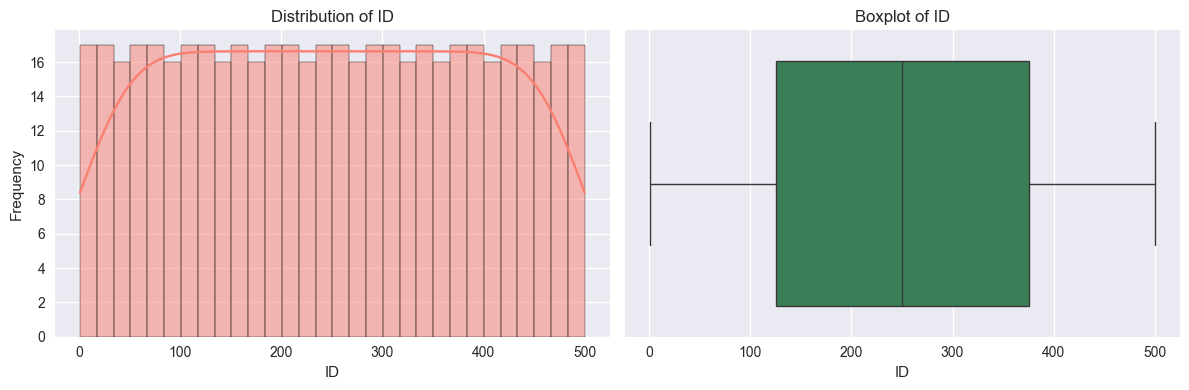


Feature: Price (₦)
         Price (₦)
count   500.000000
mean   5055.212000
std    1721.082575
min    2013.000000
25%    3668.000000
50%    5049.000000
75%    6517.500000
max    7989.000000
Missing values: 0 (0.00%)
Unique values: 489

Skewness: -0.006
Kurtosis: -1.194

Outliers detected: 0 (0.00%)
Outlier range: below -606.25 or above 10791.75
Price (₦) is fairly symmetric — no transformation likely needed.
Price (₦) shows heavy tails (leptokurtic). Consider robust scaling or outlier treatment.
 Saved plot for 'Price (₦)' → EDA_Charts\Price (₦)_univariate_plot.png


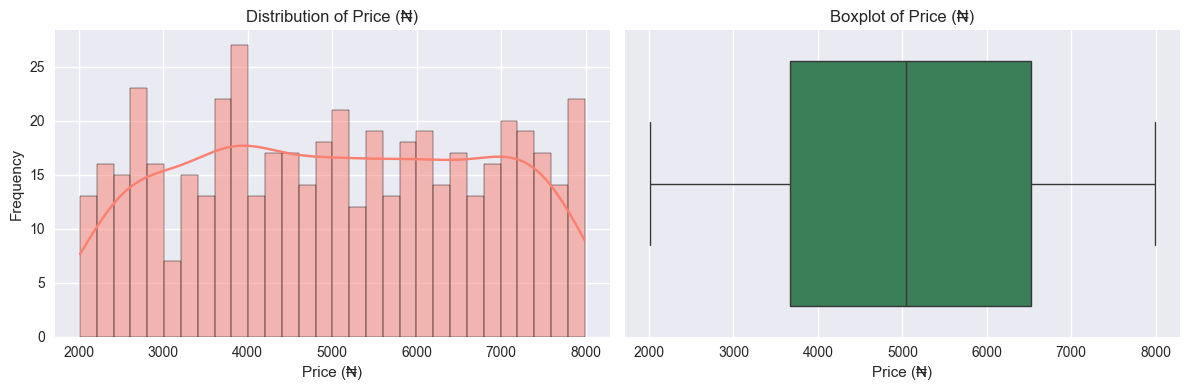

In [215]:
# We can loop to save time
for col in numerical_features:
    univariate_numerical_eda(df, col)

In [216]:
def univariate_categorical_eda(df, column, save_folder="EDA_Categorical_Charts"):
    """
    Performs univariate EDA on a single categorical column.
    Displays frequency distribution, proportion, missing values,
    and visualizations (bar plot + pie chart).
    Automatically saves each plot to a folder.
    Provides ML preprocessing suggestions.
    """

    # Create folder if it doesn’t exist
    if not os.path.exists(save_folder):
        os.makedirs(save_folder)

    print(f"\nFeature: {column}")
    print("="*45)

    # --- Summary ---
    total = len(df[column])
    missing = df[column].isna().sum()
    unique = df[column].nunique()
    mode_val = df[column].mode()[0] if unique > 0 else None

    print(f"Total observations: {total}")
    print(f"Missing values: {missing} ({(missing/total)*100:.2f}%)")
    print(f"Unique categories: {unique}")
    print(f"Most frequent category: {mode_val}")

    # --- Frequency Table ---
    freq = df[column].value_counts(dropna=False)
    perc = df[column].value_counts(normalize=True, dropna=False) * 100
    summary = pd.DataFrame({'Count': freq, 'Percentage': perc.round(2)})
    print("\nCategory Distribution:")
    print(summary)

    # --- Visualization ---
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Bar Plot
    sns.countplot(x=df[column], palette='Set2', order=freq.index, ax=axes[0])
    axes[0].set_title(f"Frequency of {column}", fontsize=13)
    axes[0].set_xlabel(column)
    axes[0].set_ylabel("Count")
    axes[0].tick_params(axis='x', rotation=30)

    # Pie Chart
    axes[1].pie(freq, labels=freq.index, autopct='%1.1f%%', startangle=90)
    axes[1].set_title(f"Proportion of {column}", fontsize=13)

    plt.tight_layout()

    # --- Save Chart ---
    save_path = os.path.join(save_folder, f"{column}_categorical_plot.png")
    plt.savefig(save_path, bbox_inches='tight', dpi=300)
    print(f"Saved plot for '{column}' → {save_path}")

    # Optional: show inline
    plt.show()

    plt.close(fig)

    # --- ML Preprocessing Suggestions ---
    if unique == 2:
        print(f" {column} is binary — suitable for Label Encoding (0/1).")
    elif 2 < unique <= 10:
        print(f" {column} has moderate categories — use One-Hot Encoding.")
    elif unique > 10:
        print(f" {column} has many unique categories — consider frequency encoding or feature grouping.")
    else:
        print(f" {column} seems low cardinality — standard encoding should work fine.")

    if (missing / total) > 0.05:
        print(f" Missing values exceed 5% — consider imputing or flagging missingness.")



Feature: Fabric_Type
Total observations: 500
Missing values: 0 (0.00%)
Unique categories: 14
Most frequent category: Rib

Category Distribution:
             Count  Percentage
Fabric_Type                   
Rib             43         8.6
Silk            42         8.4
Chinox          42         8.4
Crepe           42         8.4
Irish           39         7.8
Cashmen         38         7.6
Damask          37         7.4
Jonkoso         36         7.2
Brocade         36         7.2
Jeans           34         6.8
Linen           31         6.2
Licra           29         5.8
Milkado         26         5.2
Sevenstar       25         5.0
Saved plot for 'Fabric_Type' → EDA_Categorical_Charts\Fabric_Type_categorical_plot.png


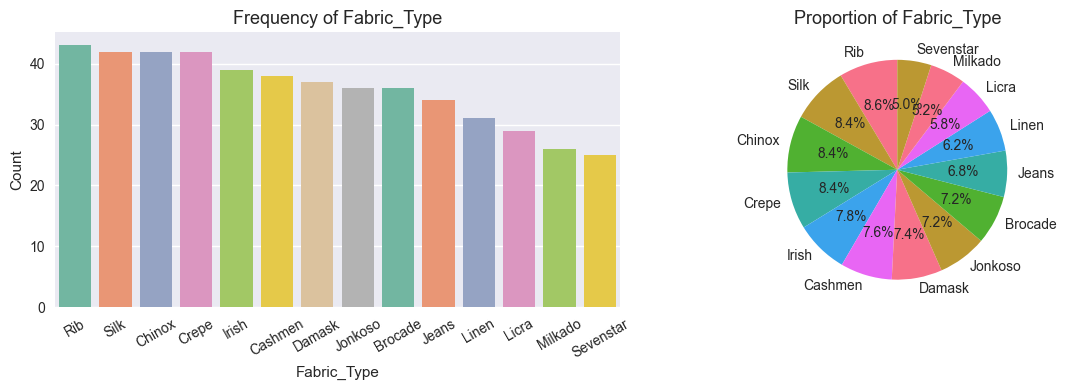

 Fabric_Type has many unique categories — consider frequency encoding or feature grouping.

Feature: Color
Total observations: 500
Missing values: 0 (0.00%)
Unique categories: 17
Most frequent category: pitch

Category Distribution:
         Count  Percentage
Color                     
pitch       38         7.6
wine        35         7.0
White       34         6.8
Black       33         6.6
Yellow      32         6.4
Grey        32         6.4
Olive       32         6.4
Cream       30         6.0
Violet      30         6.0
magenta     30         6.0
orange      28         5.6
Green       28         5.6
Pink        26         5.2
Red         25         5.0
lilac       23         4.6
Blue        22         4.4
Brown       22         4.4
Saved plot for 'Color' → EDA_Categorical_Charts\Color_categorical_plot.png


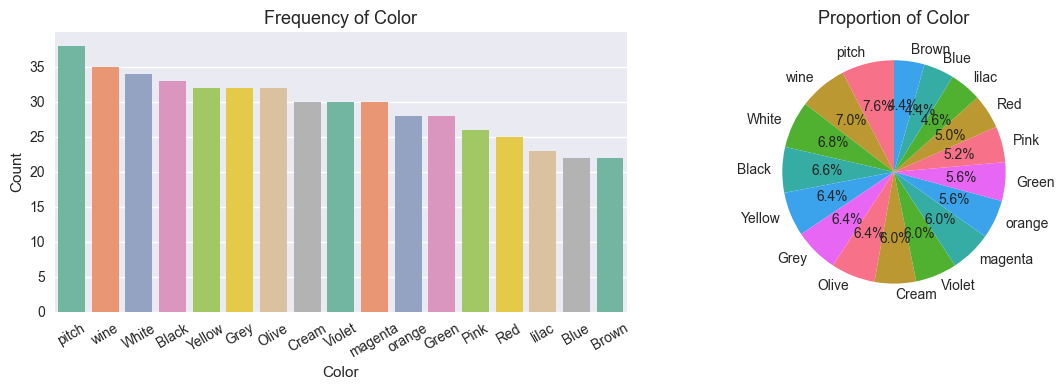

 Color has many unique categories — consider frequency encoding or feature grouping.

Feature: Gender
Total observations: 500
Missing values: 0 (0.00%)
Unique categories: 2
Most frequent category: Female

Category Distribution:
        Count  Percentage
Gender                   
Female    265        53.0
Male      235        47.0
Saved plot for 'Gender' → EDA_Categorical_Charts\Gender_categorical_plot.png


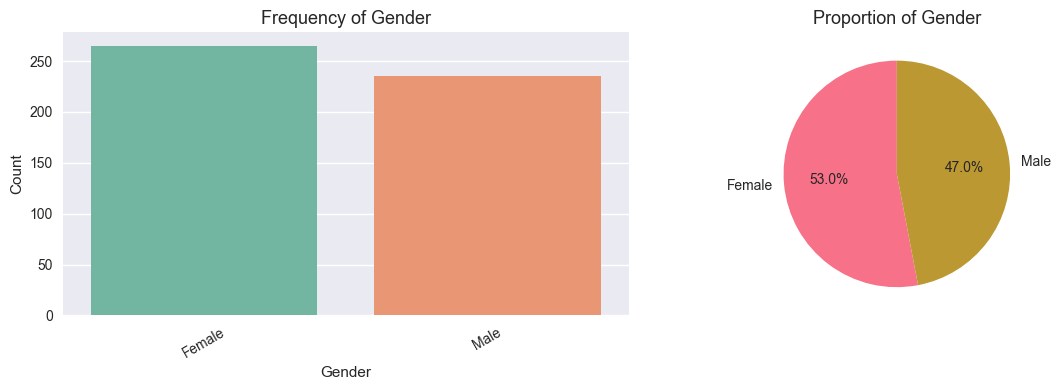

 Gender is binary — suitable for Label Encoding (0/1).

Feature: measurement_units
Total observations: 500
Missing values: 0 (0.00%)
Unique categories: 2
Most frequent category: t

Category Distribution:
                   Count  Percentage
measurement_units                   
t                    499        99.8
Meters                 1         0.2
Saved plot for 'measurement_units' → EDA_Categorical_Charts\measurement_units_categorical_plot.png


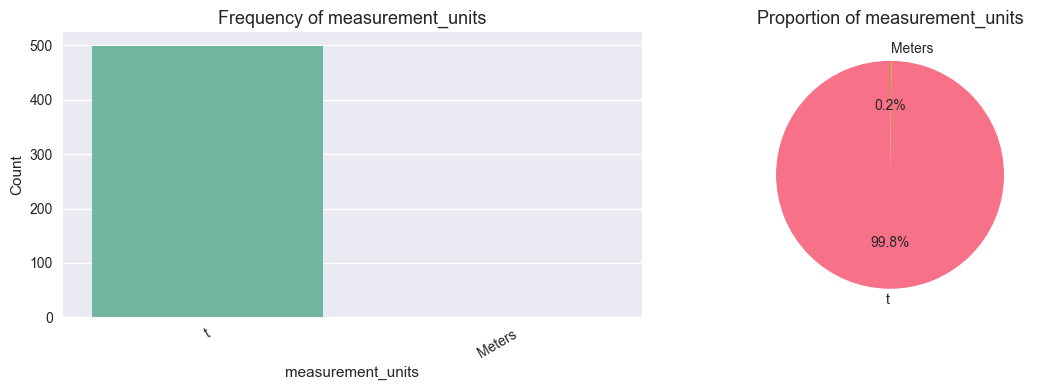

 measurement_units is binary — suitable for Label Encoding (0/1).

Feature: Season
Total observations: 500
Missing values: 0 (0.00%)
Unique categories: 2
Most frequent category: festival

Category Distribution:
          Count  Percentage
Season                     
festival    250        50.0
normal      250        50.0
Saved plot for 'Season' → EDA_Categorical_Charts\Season_categorical_plot.png


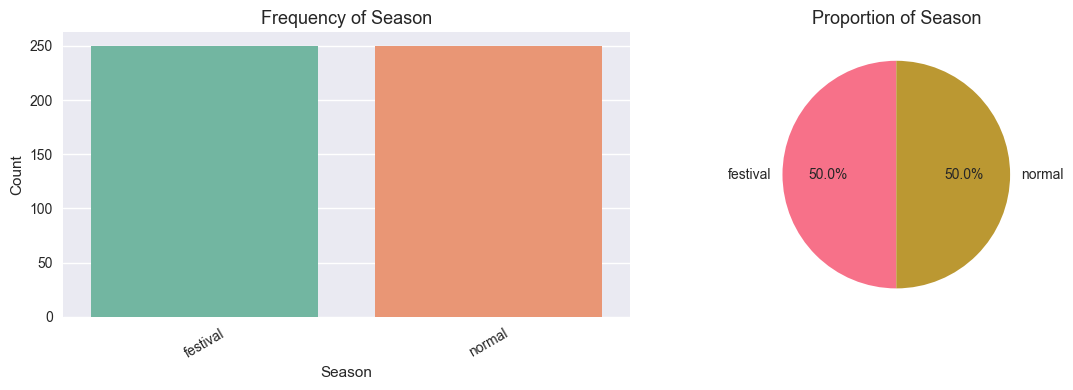

 Season is binary — suitable for Label Encoding (0/1).

Feature: Occasion
Total observations: 500
Missing values: 0 (0.00%)
Unique categories: 5
Most frequent category: Party

Category Distribution:
          Count  Percentage
Occasion                   
Party       108        21.6
Wedding     104        20.8
Church      104        20.8
Office      102        20.4
Casual       82        16.4
Saved plot for 'Occasion' → EDA_Categorical_Charts\Occasion_categorical_plot.png


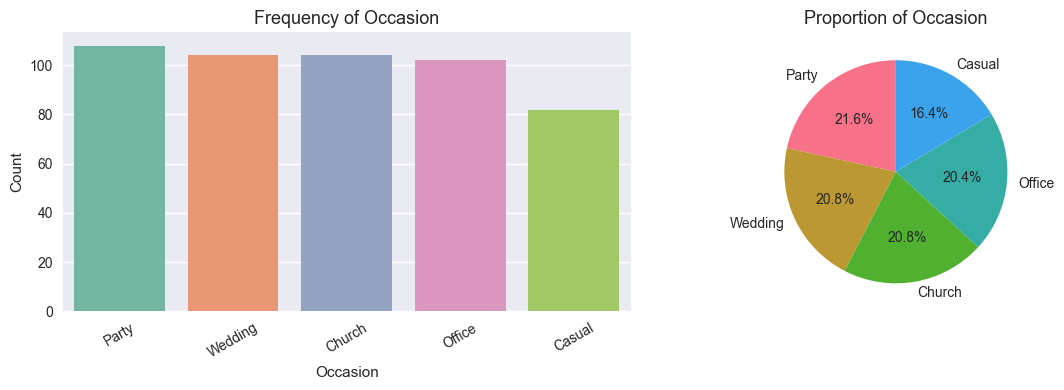

 Occasion has moderate categories — use One-Hot Encoding.

Feature: Location
Total observations: 500
Missing values: 0 (0.00%)
Unique categories: 8
Most frequent category: Enugu

Category Distribution:
               Count  Percentage
Location                        
Enugu             79        15.8
Ibadan            68        13.6
Kano              67        13.4
Lagos             64        12.8
Abeokuta          63        12.6
Abuja             61        12.2
Benin             54        10.8
Port Harcourt     44         8.8
Saved plot for 'Location' → EDA_Categorical_Charts\Location_categorical_plot.png


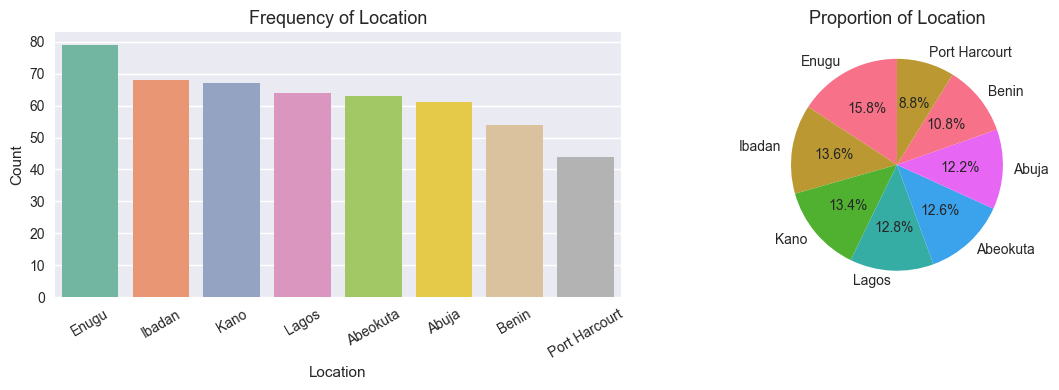

 Location has moderate categories — use One-Hot Encoding.

Feature: Stitch_Quality
Total observations: 500
Missing values: 0 (0.00%)
Unique categories: 3
Most frequent category: High

Category Distribution:
                Count  Percentage
Stitch_Quality                   
High              186        37.2
Low               157        31.4
Medium            157        31.4
Saved plot for 'Stitch_Quality' → EDA_Categorical_Charts\Stitch_Quality_categorical_plot.png


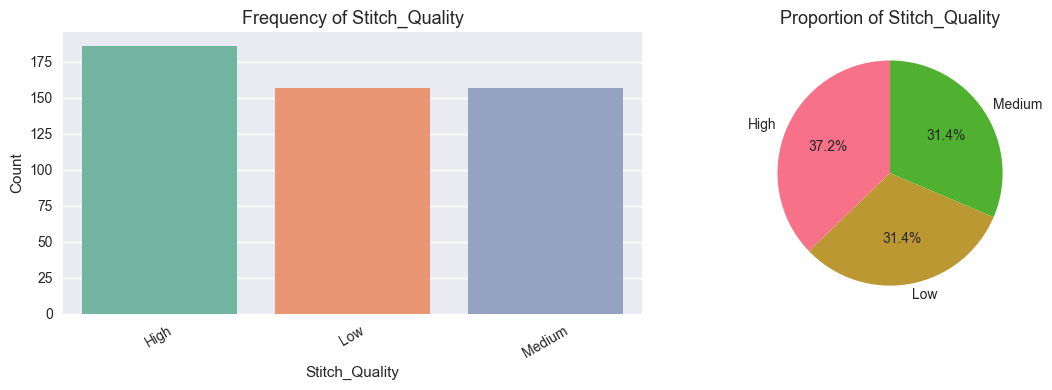

 Stitch_Quality has moderate categories — use One-Hot Encoding.

Feature: Style_Type
Total observations: 500
Missing values: 0 (0.00%)
Unique categories: 4
Most frequent category: Traditional

Category Distribution:
             Count  Percentage
Style_Type                    
Traditional    131        26.2
Casual         127        25.4
Fashion        125        25.0
Corporate      117        23.4
Saved plot for 'Style_Type' → EDA_Categorical_Charts\Style_Type_categorical_plot.png


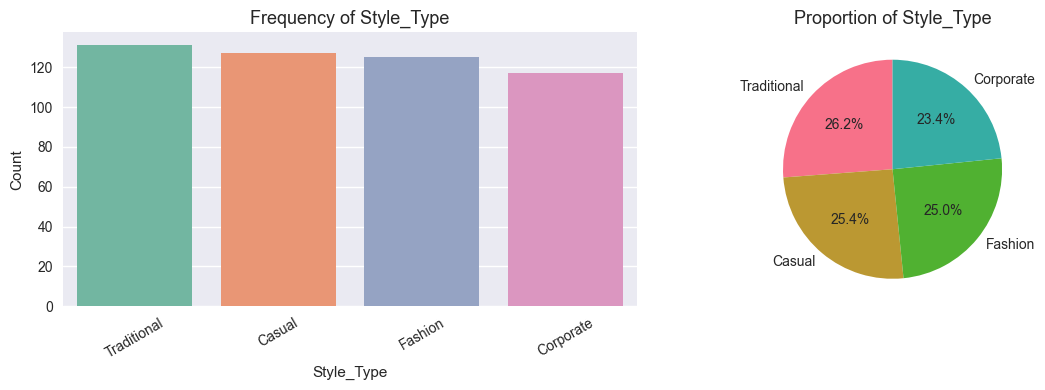

 Style_Type has moderate categories — use One-Hot Encoding.

Feature: Sold_Status
Total observations: 500
Missing values: 0 (0.00%)
Unique categories: 2
Most frequent category: Fast

Category Distribution:
             Count  Percentage
Sold_Status                   
Fast           301        60.2
Slow           199        39.8
Saved plot for 'Sold_Status' → EDA_Categorical_Charts\Sold_Status_categorical_plot.png


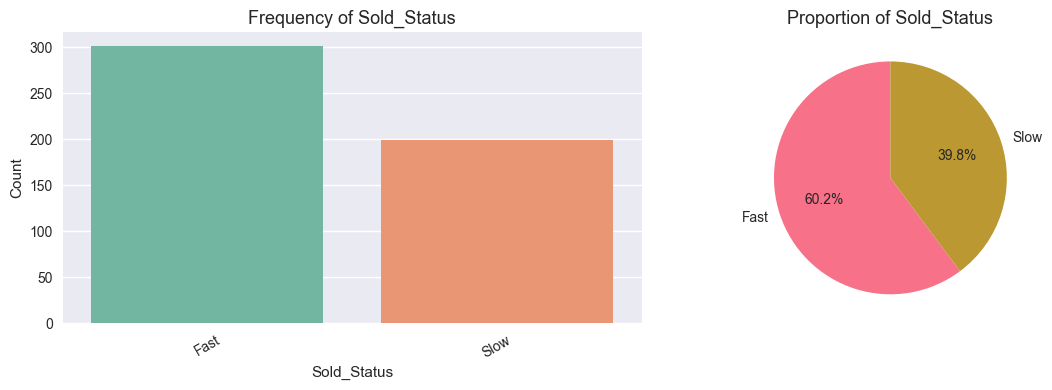

 Sold_Status is binary — suitable for Label Encoding (0/1).


In [217]:
# We can loop to save time
for col in df.select_dtypes(include=['object']).columns.tolist():
    univariate_categorical_eda(df, col)

In [218]:
def map_sold_status(x):
    if x == 'Slow':
        return 0
    elif x == 'Fast':
        return 1
    else:
        return 'Missing record'

# lets apply our function

df['Sold_Status'] = df['Sold_Status'].apply(map_sold_status)

In [219]:
df.head(3)

,ID,Fabric_Type,Color,Gender,measurement_units,Price (₦),Season,Occasion,Location,Stitch_Quality,Style_Type,Sold_Status
0,1,Brocade,orange,Male,Meters,6515,festival,Casual,Ibadan,High,Fashion,0
1,2,Licra,pitch,Male,t,4613,festival,Office,Abuja,Low,Fashion,0
2,3,Silk,lilac,Male,t,6030,normal,Church,Ibadan,High,Fashion,0


In [220]:
# Lets find the numerical features
num_features = df.select_dtypes(include=['int64', 'float64']).columns

# convert to dataframe
num_features = pd.DataFrame(df[num_features])
num_features.head(2)

,ID,Price (₦),Sold_Status
0,1,6515,0
1,2,4613,0


In [221]:
df.columns

Index(['ID', 'Fabric_Type', 'Color', 'Gender', 'measurement_units',
       'Price (₦)', 'Season', 'Occasion', 'Location', 'Stitch_Quality',
       'Style_Type', 'Sold_Status'],
      dtype='object')

In [224]:
import pandas as pd

def preprocess_clothing_data(df):
    """
    Preprocess the clothing sales dataset for machine learning models.
    Converts categorical variables into numeric form using label encoding and one-hot encoding.
    """

    # ---- Label Encoding (binary columns) ----
    label_map = {
        'Gender': {'Male': 1, 'Female': 0},
        #'Sold_Status': {'Fast': 1, 'Slow': 0}
    }

    for col, mapping in label_map.items():
        if col in df.columns:
            df[col] = df[col].map(mapping)

    # ---- One-Hot Encoding (multi-category columns) ----
    one_hot_columns = [
        'Fabric_Type', 'Color', 'measurement_units', 'Season', 'Occasion',
        'Location', 'Stitch_Quality', 'Style_Type'
    ]

    df = pd.get_dummies(df, columns=one_hot_columns, drop_first=False, dtype=int)

    # ---- Drop ID column if exists ----
    if 'ID' in df.columns:
        df = df.drop('ID', axis=1)

    print("\nPreprocessing complete. Encoded columns are now numeric.")
    return df


In [225]:
df_processed = preprocess_clothing_data(df)

# Check output
print(df_processed.head())
print(df_processed.shape)


Preprocessing complete. Encoded columns are now numeric.
   Gender  Price (₦)  Sold_Status  Fabric_Type_Brocade  Fabric_Type_Cashmen  \
0       1       6515            0                    1                    0   
1       1       4613            0                    0                    0   
2       1       6030            0                    0                    0   
3       0       2071            0                    0                    0   
4       1       2659            1                    0                    0   

   Fabric_Type_Chinox  Fabric_Type_Crepe  Fabric_Type_Damask  \
0                   0                  0                   0   
1                   0                  0                   0   
2                   0                  0                   0   
3                   0                  0                   0   
4                   0                  0                   0   

   Fabric_Type_Irish  Fabric_Type_Jeans  ...  Location_Kano  Location_Lagos  \
0  

In [ ]:
# Lets find the numerical features
num_features = df_processed.select_dtypes(include=['int64', 'float64']).columns

# convert to dataframe
num_features = pd.DataFrame(df_processed[num_features])
num_features.head(2)

,Gender,Price (₦),Sold_Status,Fabric_Type_Brocade,Fabric_Type_Cashmen,Fabric_Type_Chinox,Fabric_Type_Crepe,Fabric_Type_Damask,Fabric_Type_Irish,Fabric_Type_Jeans,...,Location_Kano,Location_Lagos,Location_Port Harcourt,Stitch_Quality_High,Stitch_Quality_Low,Stitch_Quality_Medium,Style_Type_Casual,Style_Type_Corporate,Style_Type_Fashion,Style_Type_Traditional
0,0,2936,1,0,0,0,0,0,0,1,...,0,1,0,0,1,0,0,1,0,0
1,0,5121,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# Core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import warnings
warnings.filterwarnings('ignore')

# Preprocessing libraries
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix

# Statistical libraries
from scipy import stats
from scipy.stats import zscore, skew

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("Libraries imported successfully!")


# Statistical libraries
from scipy import stats
from scipy.stats import zscore, skew

Libraries imported successfully!


In [ ]:
# Stratified data splitting based on EDA findings about class imbalance
print("=== STRATIFIED DATA SPLITTING ===")
print("EDA identified class imbalance - using stratified splitting to preserve class distribution")

# Select the chosen features
X = df_processed.drop('Sold_Status', axis=1)
y = df_processed['Sold_Status']
print(f"Selected features shape: {X.shape}")

# First split: 80% train+val, 20% test
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Second split: 75% train, 25% validation (of the 80%)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp
)

print(f"\nData split results:")
print(f"Training set: {X_train.shape} ({(X_train.shape[0]/len(X))*100:.1f}%)")
print(f"Validation set: {X_val.shape} ({(X_val.shape[0]/len(X))*100:.1f}%)")
print(f"Test set: {X_test.shape} ({(X_test.shape[0]/len(X))*100:.1f}%)")

# Check class distribution in each set (should be similar due to stratification)
print(f"\nClass distribution verification:")
print("Training set quality distribution:")
print(y_train.value_counts().sort_index())
print("\nValidation set quality distribution:")
print(y_val.value_counts().sort_index())
print("\nTest set quality distribution:")
print(y_test.value_counts().sort_index())


=== STRATIFIED DATA SPLITTING ===
EDA identified class imbalance - using stratified splitting to preserve class distribution
Selected features shape: (500, 57)

Data split results:
Training set: (300, 57) (60.0%)
Validation set: (100, 57) (20.0%)
Test set: (100, 57) (20.0%)

Class distribution verification:
Training set quality distribution:
Sold_Status
0    114
1    186
Name: count, dtype: int64

Validation set quality distribution:
Sold_Status
0    38
1    62
Name: count, dtype: int64

Test set quality distribution:
Sold_Status
0    38
1    62
Name: count, dtype: int64


In [ ]:
# Apply StandardScaler as recommended by EDA
print("=== FEATURE SCALING (STANDARD SCALER) ===")
print("EDA recommended StandardScaler for distance-based models")

# Fit scaler on training data only (to avoid data leakage)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Transform validation and test sets
X_val_scaled = scaler.transform(X_val)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=X_val.columns)

X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print("✓ Scaling applied successfully!")
print(f"Training set scaled - Mean: {X_train_scaled.mean().mean():.4f}, Std: {X_train_scaled.std().mean():.4f}")
print(f"Validation set scaled - Mean: {X_val_scaled.mean().mean():.4f}, Std: {X_val_scaled.std().mean():.4f}")
print(f"Test set scaled - Mean: {X_test_scaled.mean().mean():.4f}, Std: {X_test_scaled.std().mean():.4f}")

# Verify scaling worked correctly
print(f"\nScaling verification:")
print(f"Training set - Mean ≈ 0: {abs(X_train_scaled.mean().mean()) < 0.01}")
print(f"Training set - Std ≈ 1: {abs(X_train_scaled.std().mean() - 1) < 0.01}")


=== FEATURE SCALING (STANDARD SCALER) ===
EDA recommended StandardScaler for distance-based models
✓ Scaling applied successfully!
Training set scaled - Mean: -0.0000, Std: 1.0017
Validation set scaled - Mean: 0.0043, Std: 0.9611
Test set scaled - Mean: 0.0008, Std: 0.9589

Scaling verification:
Training set - Mean ≈ 0: True
Training set - Std ≈ 1: True


In [ ]:
print("SAVING PREPROCESSED DATA ")

# Save scaled datasets
X_train_scaled.to_csv('X_train_scaled.csv', index=False)
X_val_scaled.to_csv('X_val_scaled.csv', index=False)
X_test_scaled.to_csv('X_test_scaled.csv', index=False)

# Save target variables
y_train.to_csv('y_train.csv', index=False)
y_val.to_csv('y_val.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

# Save preprocessing objects
import joblib
joblib.dump(scaler, 'scaler.pkl')


# Save preprocessing summary
preprocessing_summary = {
    'original_shape': df.shape,
    'final_shape': df_processed.shape,
  
   
    'train_samples': X_train_scaled.shape[0],
    'val_samples': X_val_scaled.shape[0],
    'test_samples': X_test_scaled.shape[0],
    'scaling_method': 'StandardScaler',
    
}

import json
with open('preprocessing_summary.json', 'w') as f:
    json.dump(preprocessing_summary, f, indent=2)

print("- Preprocessed data saved successfully!")
print("\nFiles created:")
print("- X_train_scaled.csv, X_val_scaled.csv, X_test_scaled.csv")
print("- y_train.csv, y_val.csv, y_test.csv")
print("- scaler.pkl")
print("- preprocessing_summary.json")


SAVING PREPROCESSED DATA 
- Preprocessed data saved successfully!

Files created:
- X_train_scaled.csv, X_val_scaled.csv, X_test_scaled.csv
- y_train.csv, y_val.csv, y_test.csv
- scaler.pkl
- preprocessing_summary.json
